# Nama: Maximilian Sulistiyo
# NIM: 13522061

# 1 Import Libraries and Images

Import Library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import images

In [48]:
from skimage import data 
cameraman = data.camera()
coin = data.coins()
checkerboard = data.checkerboard()
maisan = cv2.imread("../test_pictures/maisan.png", cv2.IMREAD_GRAYSCALE)
seiko = cv2.imread("../test_pictures/seiko_panda.jpg", cv2.IMREAD_GRAYSCALE)

# 2 Edge Detection Functions

## Sobel Edge

In [ ]:
def apply_sobel_edge(image, ksize=3, threshold=50):
    """
    Apply Sobel edge detection
    """
    # Calculate gradients in x and y directions
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=ksize)
    
    # Calculate gradient magnitude
    sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Normalize to 0-255
    sobel_magnitude = np.uint8(255 * sobel_magnitude / np.max(sobel_magnitude))
    
    # Apply threshold
    _, sobel_binary = cv2.threshold(sobel_magnitude, threshold, 255, cv2.THRESH_BINARY)
    
    return sobel_binary

## Canny Edge

In [ ]:
def apply_canny_edge(image, low_threshold=50, high_threshold=150):
    """
    Apply Canny edge detection
    """
    # Apply Canny edge detection
    edges = cv2.Canny(image, low_threshold, high_threshold)
    
    
    return edges

# 3 Testing

In [41]:
def show_image(image, image_name):
    plt.imshow(image, cmap='gray')
    plt.title(f'{image_name}')
    plt.axis('off')
    plt.show()

In [51]:
def test_edge_detection(image, image_name, kernel_size_sobel, sobel_threshold, low_canny_threshold, high_canny_threshold):
    # Show original image
    show_image(image, image_name)

    # Edge detection
    sobel_edge = apply_sobel_edge(image, kernel_size_sobel, sobel_threshold)
    canny_edge = apply_canny_edge(image, low_canny_threshold, high_canny_threshold)

    # Show edge
    show_image(sobel_edge, f"{image_name} Sobel Edge")
    show_image(canny_edge, f"{image_name} Canny Edge")

    # Save edge images
    cv2.imwrite(f"{image_name}_sobel_edge.png", sobel_edge)
    cv2.imwrite(f"{image_name}_canny_edge.png", sobel_edge)

### 3.1 Cameraman

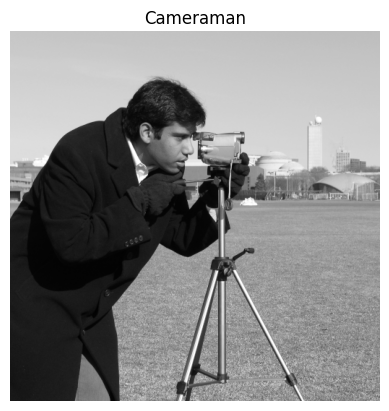

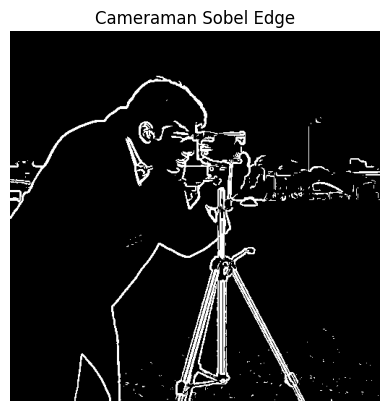

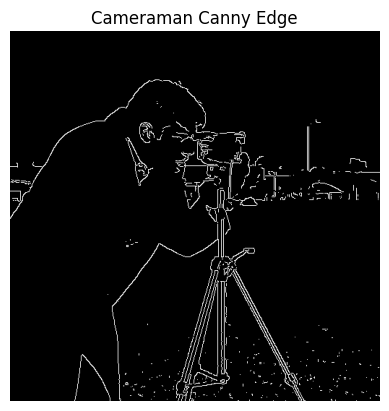

In [52]:
test_edge_detection(cameraman, "Cameraman", kernel_size_sobel = 5, sobel_threshold = 50, 
                    low_canny_threshold = 250, high_canny_threshold = 300)

### 3.2 Coin

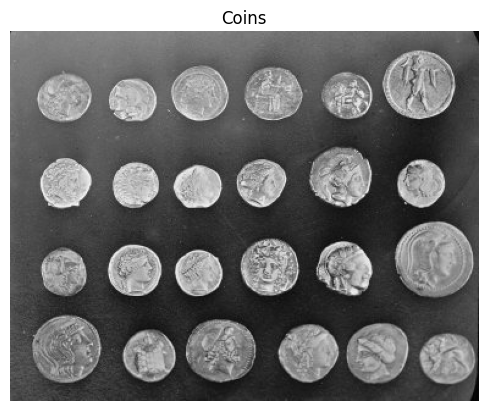

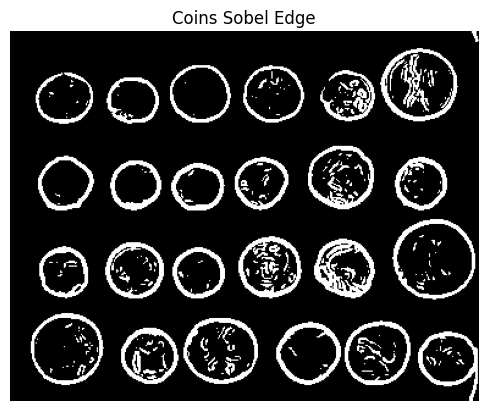

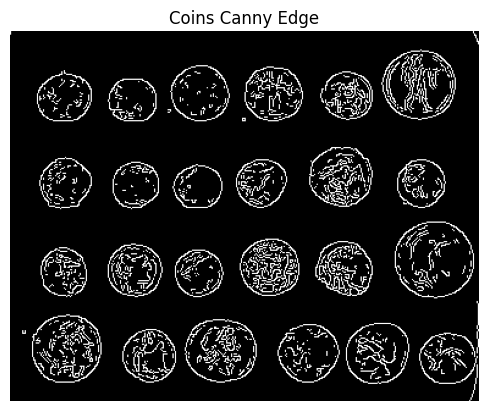

In [57]:
test_edge_detection(coin, "Coins", kernel_size_sobel = 7, sobel_threshold = 50, 
                    low_canny_threshold = 150, high_canny_threshold = 200)

### 3.3 Checkerboard

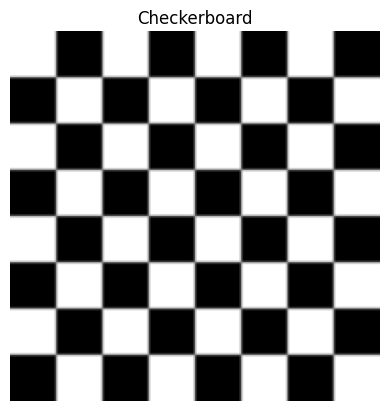

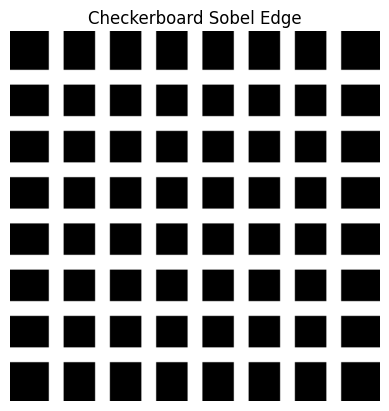

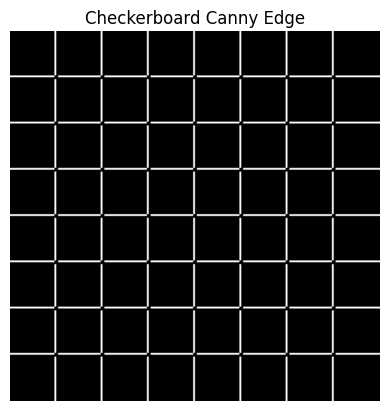

In [58]:
test_edge_detection(checkerboard, "Checkerboard", kernel_size_sobel = 11, sobel_threshold = 25, 
                    low_canny_threshold = 200, high_canny_threshold = 250)

## 3.3 Maisan

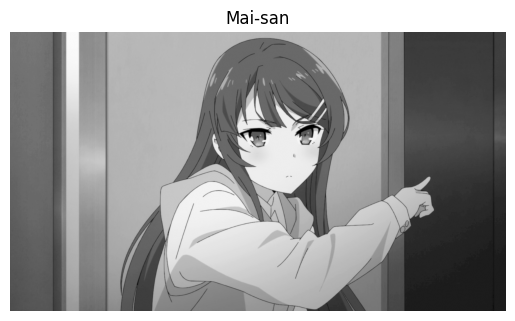

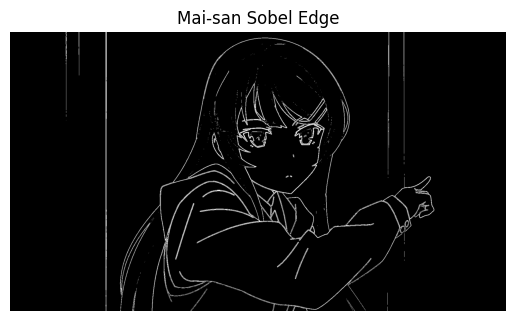

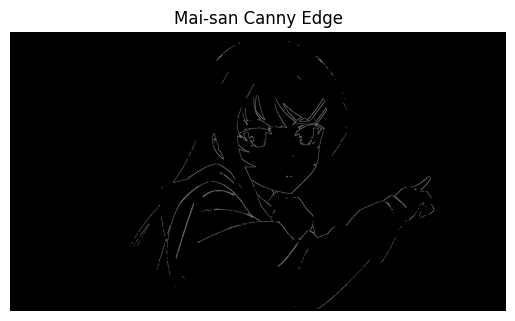

In [64]:
test_edge_detection(maisan, "Mai-san", kernel_size_sobel = 3, sobel_threshold = 70, 
                    low_canny_threshold = 450, high_canny_threshold = 500)

## 3.4 Seiko

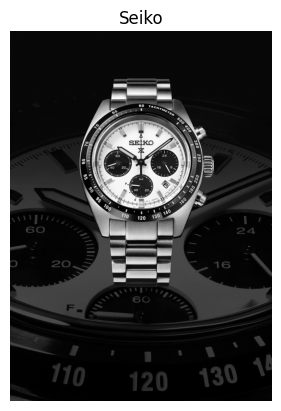

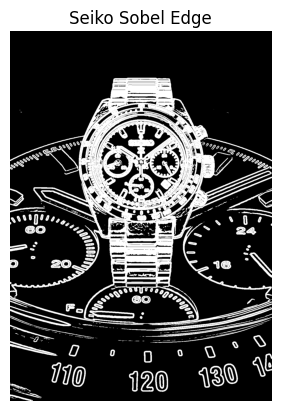

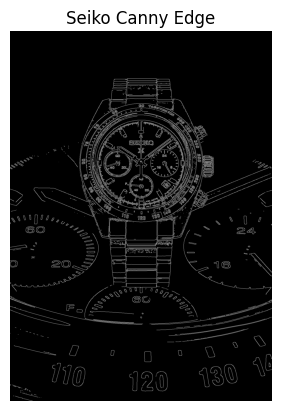

In [63]:
test_edge_detection(seiko, "Seiko", kernel_size_sobel = 15, sobel_threshold = 10, 
                    low_canny_threshold = 100, high_canny_threshold = 120)